# Loading Data

In [147]:
   from google.colab import drive

   drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
   import pandas as pd

   df = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [149]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [151]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Preprocessing

In [152]:
x = df.drop('HeartDisease', axis = 1) # axis = 1 because we want column or we can use axis = column
y = df['HeartDisease']

In [153]:
# label encoder
from sklearn.preprocessing import LabelEncoder
x = x.apply(LabelEncoder().fit_transform)
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2


In [154]:
from sklearn.model_selection import train_test_split
train_features, train_labels, test_features, test_labels = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [155]:
import numpy as np
train_features = np.array(train_features)
train_labels = np.array(train_labels)
test_features = np.array(test_features)
test_labels = np.array(test_labels)

In [156]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_features = scaler.fit_transform(train_features)
train_labels = scaler.transform(train_labels)


# Model definition

In [157]:
import tensorflow as tf
from tensorflow import keras

In [158]:
model = keras.Sequential()

model.add(keras.layers.Input(shape = (11, )))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = tf.optimizers.Adam(),
              loss = tf.losses.binary_crossentropy,
              metrics = ['accuracy'])

In [159]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 128)               1536      
                                                                 
 dropout_24 (Dropout)        (None, 128)               0         
                                                                 
 dense_46 (Dense)            (None, 128)               16512     
                                                                 
 dropout_25 (Dropout)        (None, 128)               0         
                                                                 
 dense_47 (Dense)            (None, 128)               16512     
                                                                 
 dropout_26 (Dropout)        (None, 128)               0         
                                                                 
 dense_48 (Dense)            (None, 128)             

In [160]:
hist = model.fit(train_features, test_features, epochs = 60, batch_size = 128, validation_data = [train_labels, test_labels])

Epoch 1/60
6/6 [==============================] - 2s 43ms/step - loss: 0.6790 - accuracy: 0.5586 - val_loss: 0.6487 - val_accuracy: 0.6739
Epoch 2/60
6/6 [==============================] - 0s 12ms/step - loss: 0.6341 - accuracy: 0.5940 - val_loss: 0.5816 - val_accuracy: 0.7228
Epoch 3/60
6/6 [==============================] - 0s 12ms/step - loss: 0.5808 - accuracy: 0.6662 - val_loss: 0.5059 - val_accuracy: 0.8207
Epoch 4/60
6/6 [==============================] - 0s 9ms/step - loss: 0.5024 - accuracy: 0.7984 - val_loss: 0.4542 - val_accuracy: 0.7772
Epoch 5/60
6/6 [==============================] - 0s 10ms/step - loss: 0.4276 - accuracy: 0.8243 - val_loss: 0.4458 - val_accuracy: 0.7717
Epoch 6/60
6/6 [==============================] - 0s 9ms/step - loss: 0.4396 - accuracy: 0.8188 - val_loss: 0.4509 - val_accuracy: 0.7880
Epoch 7/60
6/6 [==============================] - 0s 9ms/step - loss: 0.4182 - accuracy: 0.8215 - val_loss: 0.4008 - val_accuracy: 0.8152
Epoch 8/60
6/6 [==============

In [161]:
model.evaluate(train_labels, test_labels)

6/6 [==============================] - 0s 3ms/step - loss: 0.3270 - accuracy: 0.9130


[0.32701146602630615, 0.9130434989929199]

# Plot

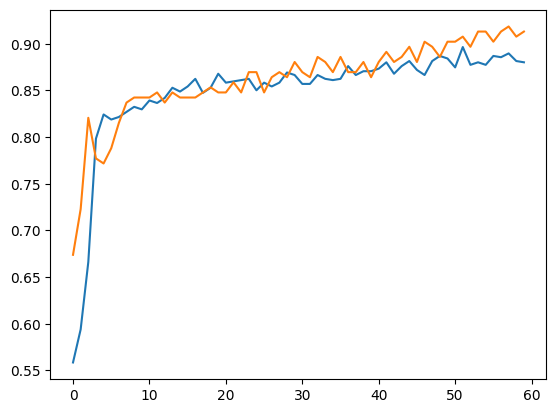

In [162]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

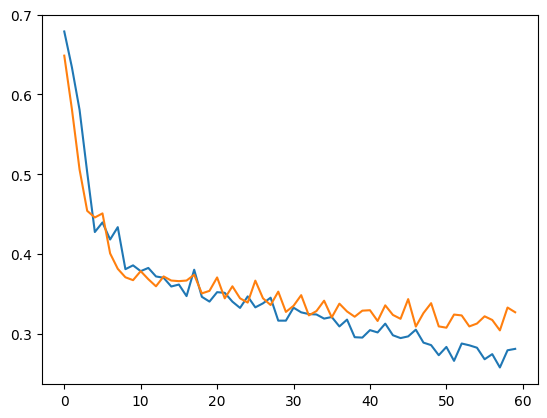

In [163]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])